original image


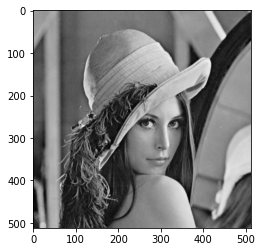

In [332]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from scipy.signal import correlate2d

img=cv2.imread("images/Lena.png",0)
print("original image")
plt.imshow(img,cmap="gray")
plt.show()

noise 0.1:


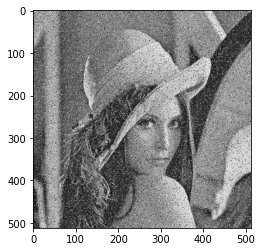

noise 0.2:


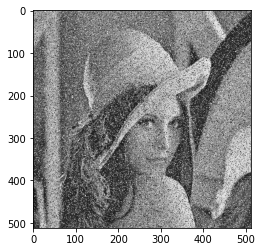

noise 0.3:


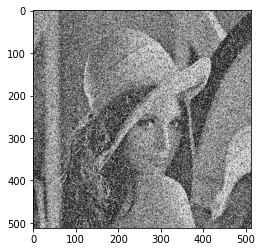

noise 0.4:


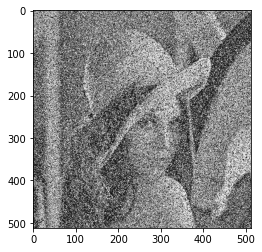

noise 0.5:


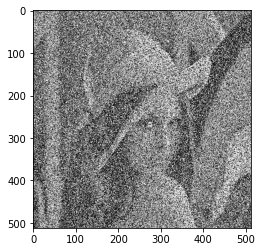

noise 0.6:


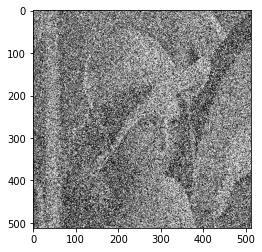

noise 0.7:


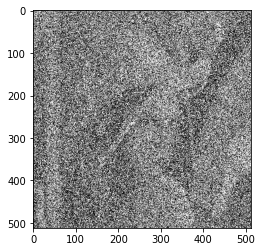

noise 0.8:


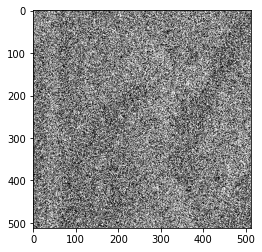

noise 0.9:


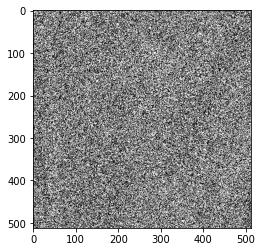

noise 1.0:


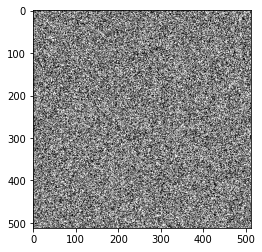

In [333]:
images_with_noise=[]
for i in range(1,11):
    images_with_noise.append((random_noise(img, mode='s&p', amount=i/10)*255).astype(np.uint8))
    plt.imshow(images_with_noise[-1],cmap="gray")
    print(f"noise {i/10}:")
    plt.show()

window size:  3
window:  [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
noise 0.1:


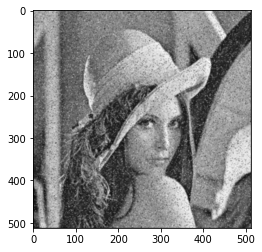

noise 0.2:


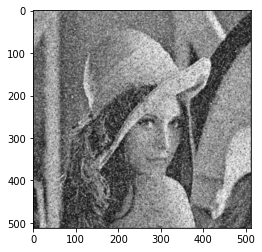

noise 0.3:


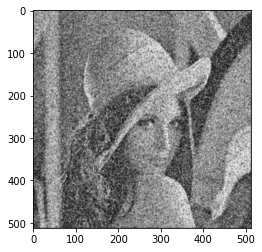

noise 0.4:


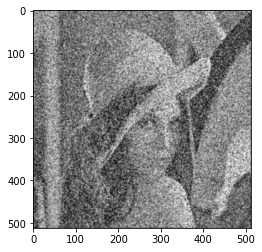

noise 0.5:


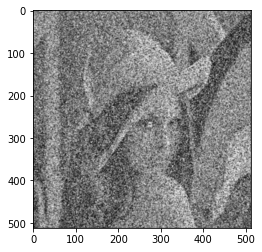

noise 0.6:


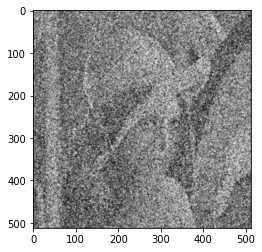

noise 0.7:


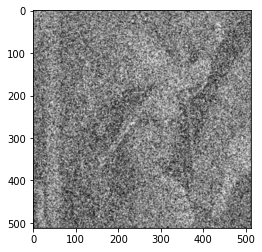

noise 0.8:


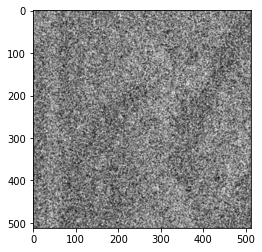

noise 0.9:


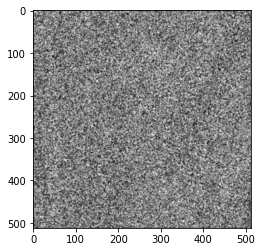

noise 1.0:


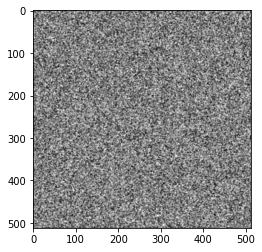

window size:  5
window:  [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
noise 0.1:


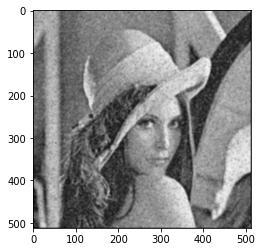

noise 0.2:


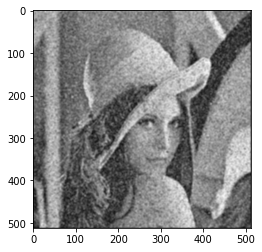

noise 0.3:


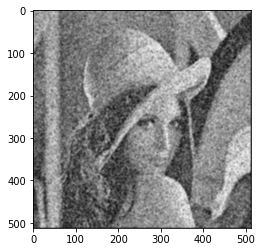

noise 0.4:


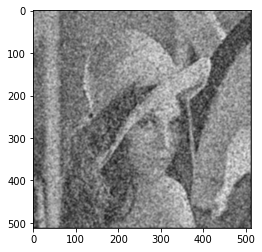

noise 0.5:


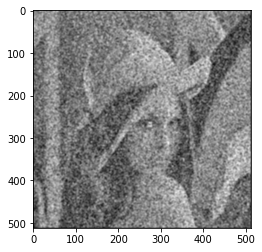

noise 0.6:


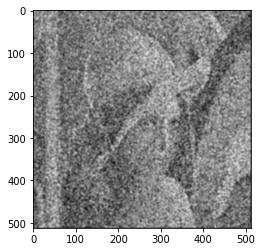

noise 0.7:


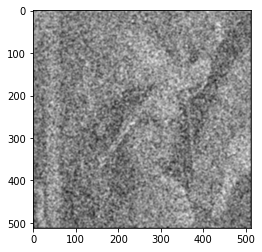

noise 0.8:


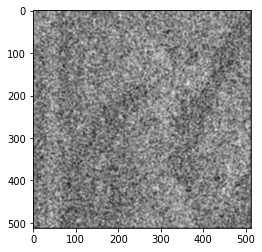

noise 0.9:


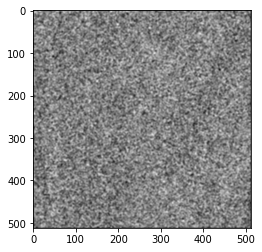

noise 1.0:


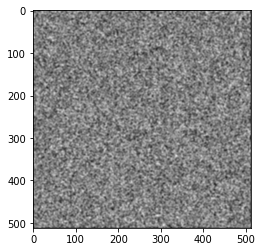

window size:  7
window:  [[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]
noise 0.1:


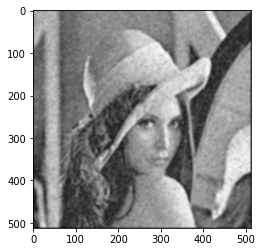

noise 0.2:


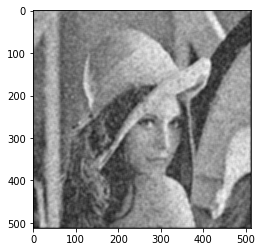

noise 0.3:


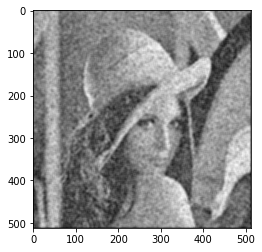

noise 0.4:


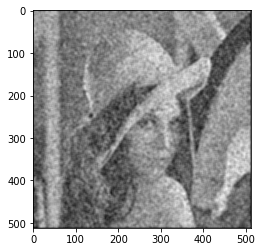

noise 0.5:


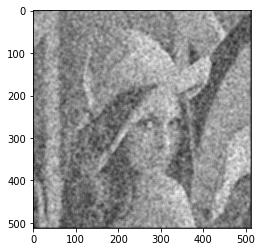

noise 0.6:


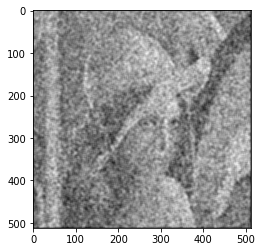

noise 0.7:


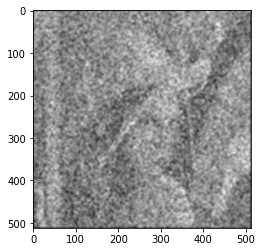

noise 0.8:


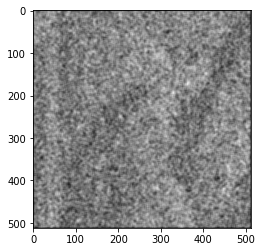

noise 0.9:


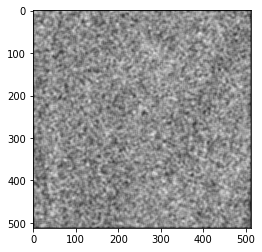

noise 1.0:


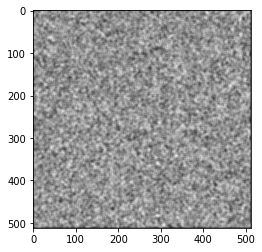

In [334]:
sizes=[3,5,7]
for size in sizes:
    w=np.array([[1]*size]*size)/size**2
    print("window size: ",size)
    print("window: ",w)
    for i,noise_img in enumerate(images_with_noise):
        avg_img=correlate2d(noise_img,w,mode="same",boundary="fill",fillvalue=0)
        plt.imshow(avg_img,cmap="gray")
        print(f"noise {(i+1)/10}:")
        plt.show()

window size:  3
noise 0.1:


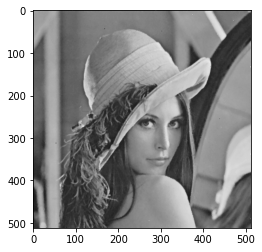

noise 0.2:


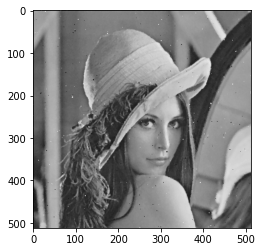

noise 0.3:


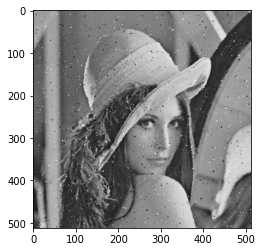

noise 0.4:


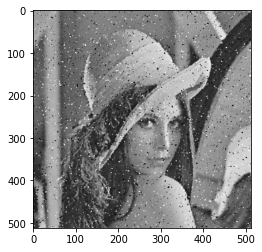

noise 0.5:


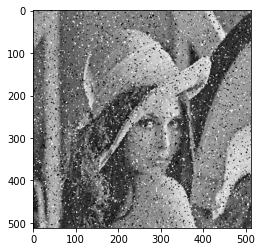

noise 0.6:


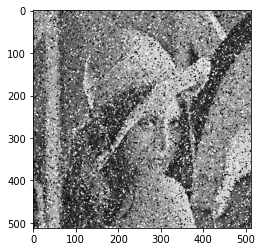

noise 0.7:


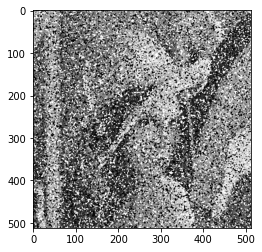

noise 0.8:


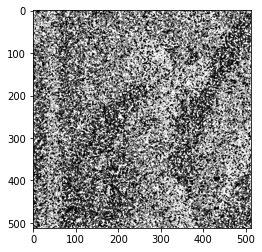

noise 0.9:


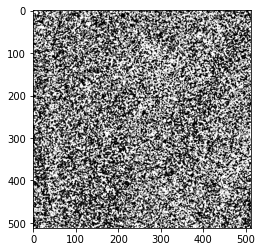

noise 1.0:


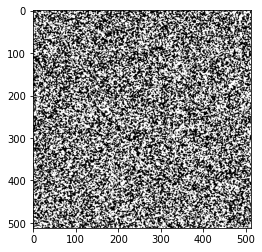

window size:  5
noise 0.1:


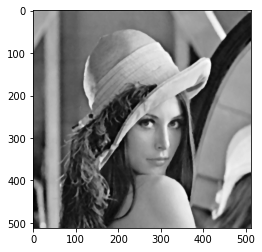

noise 0.2:


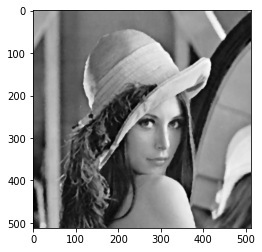

noise 0.3:


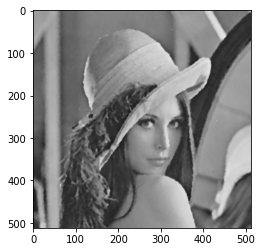

noise 0.4:


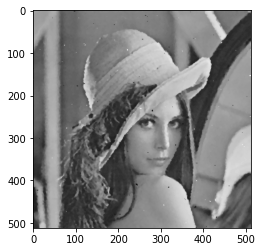

noise 0.5:


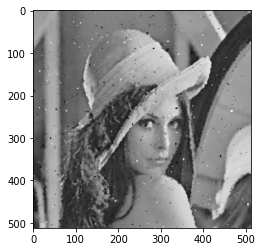

noise 0.6:


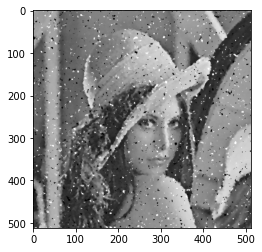

noise 0.7:


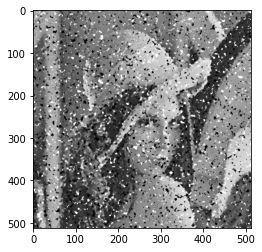

noise 0.8:


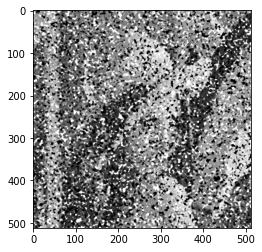

noise 0.9:


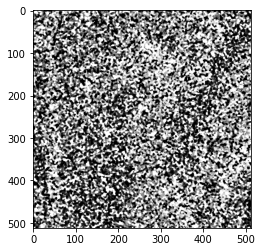

noise 1.0:


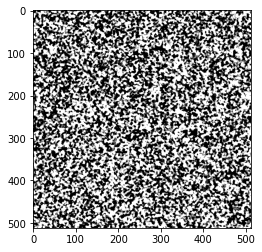

window size:  7
noise 0.1:


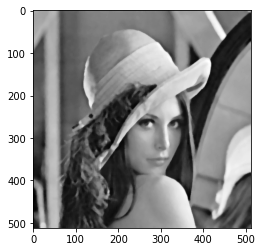

noise 0.2:


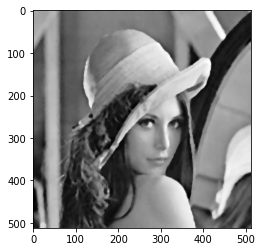

noise 0.3:


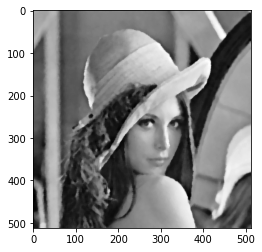

noise 0.4:


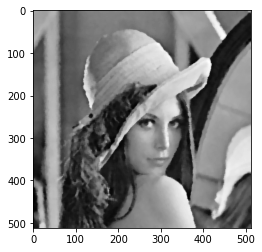

noise 0.5:


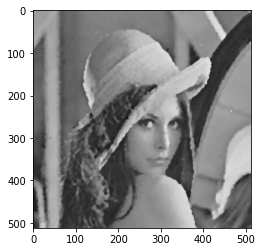

noise 0.6:


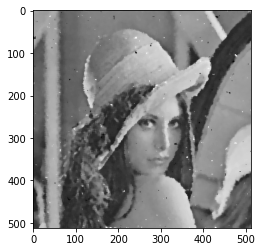

noise 0.7:


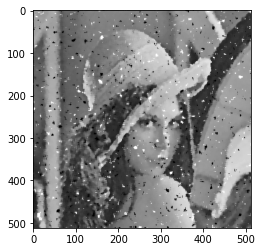

noise 0.8:


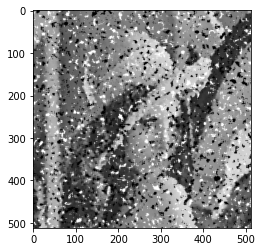

noise 0.9:


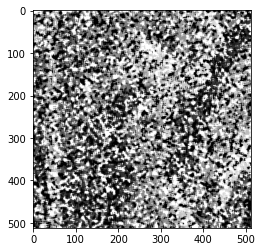

noise 1.0:


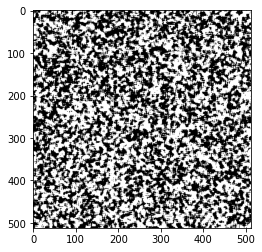

In [335]:
def median_filter(img,window_size):
    assert window_size%2==1, "window_size should be odd for symmetry"
    length=int((window_size-1)/2)
    median_img=np.zeros_like(img)
    ul,dl=0,img.shape[0]-1
    ll,rl=0,img.shape[1]-1
    for x in range(dl+1):
        for y in range(rl+1):
            values=[]
            u,d=x-length,x+length
            l,r=y-length,y+length
            if(u<0):
                u=0
            if(l<0):
                l=0
            if(d>dl):
                d=dl
            if(r>rl):
                r=rl
            for i in range(u,d+1):
                for j in range(l,r+1):
                    values.append(img[i][j])
            values=sorted(values)
            median_img[x][y]=values[len(values)>>1]
    return median_img
            
for size in sizes:
    print("window size: ",size)
    for i,noise_img in enumerate(images_with_noise):
        median_img=median_filter(noise_img,size)
        plt.imshow(median_img,cmap="gray")
        print(f"noise {(i+1)/10}:")
        plt.show()

In [338]:
def normalised_cross_correlation(f,w):
    assert (f.ndim==2 and w.ndim==2),"both f and w must be greyscale images"
    f_mean=np.mean(f)
    w_mean=np.mean(w)
    f_=f-f_mean
    w_=w-w_mean
    corr=correlate2d(f_,w_,mode="same",boundary="fill",fillvalue=0)
    norm=(np.sum(np.square(f_))*np.sum(np.square(w_)))**0.5
    return corr/norm

def mark_point_and_draw_box(img,center,left_top,right_bottom):
    
    # indices have to be reversed since opencv uses column, row notation
    
    x=tuple(center[::-1])
    cv2.circle(img, x, 6, color=(255,0,0), thickness=-1)
    
    x=tuple(center[::-1]-[10,10])
    y=tuple(center[::-1]+[10,10])
    cv2.line(img, x, y, (255,0,0), 2)
    
    x=tuple(center[::-1]+[10,-10])
    y=tuple(center[::-1]+[-10,10])
    cv2.line(img, x, y, (255,0,0), 2)
    
    x=tuple(left_top[::-1])
    y=tuple(right_bottom[::-1])
    cv2.rectangle(img, x, y, color=(255,0,0), thickness=2)

def locate(f,w):
    
    # get matching locations
    ncc_mat=normalised_cross_correlation(f,w)
    std=np.std(ncc_mat)
    T=np.amax(ncc_mat)-std*0.01
    locs=np.argwhere(ncc_mat>=T)
    shift=np.array(w.shape)//2
    
    # draw rectangles over matched areas
    output_img=cv2.cvtColor(f,cv2.COLOR_GRAY2BGR)
    for center,s,e in zip(locs,locs-shift,locs+shift):
        mark_point_and_draw_box(output_img,center,s,e)
    
    return output_img,locs

image: 


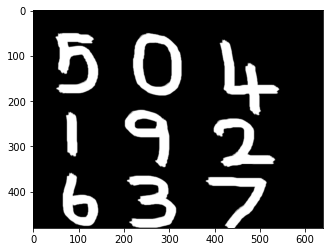

search: 


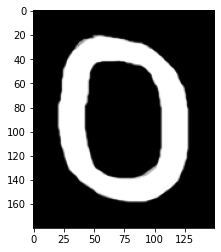

matching locations: [[119 274]]


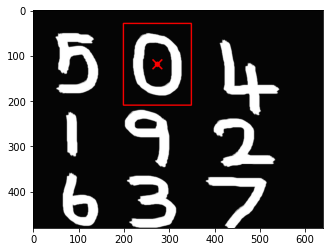

search: 


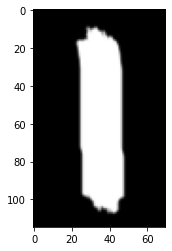

matching locations: [[272  84]]


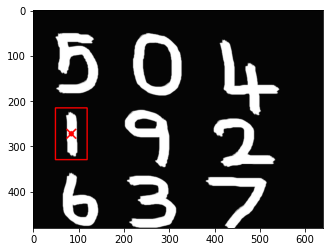

search: 


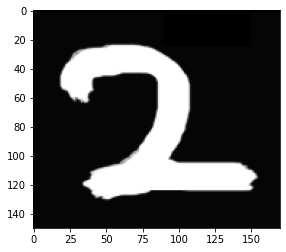

matching locations: [[289 464]]


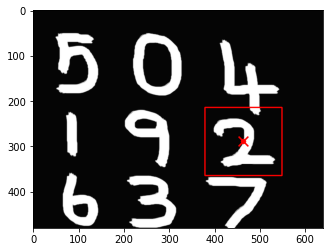

search: 


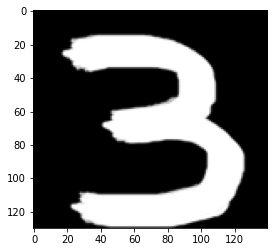

matching locations: [[414 259]]


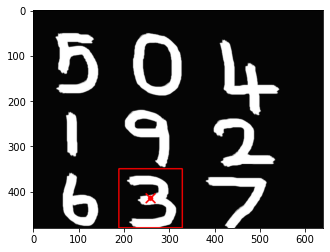

search: 


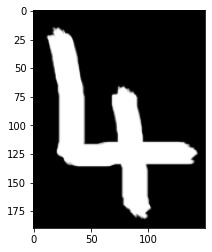

matching locations: [[144 474]]


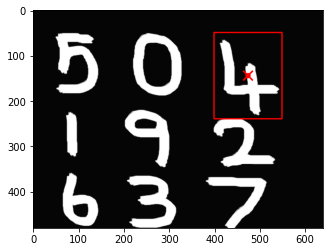

search: 


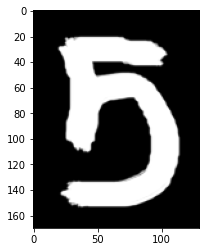

matching locations: [[114  94]]


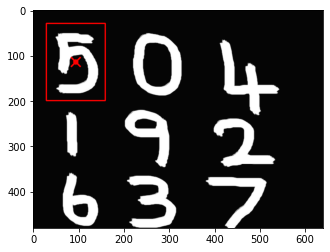

search: 


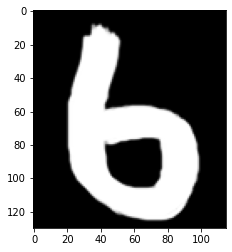

matching locations: [[414 102]]


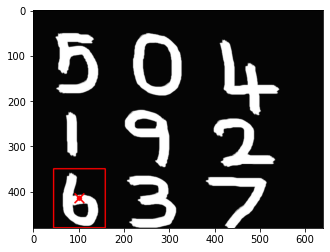

search: 


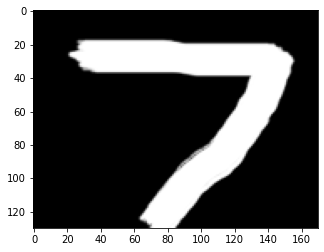

matching locations: [[414 444]]


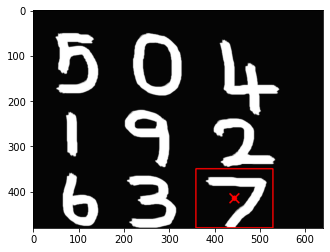

search: 


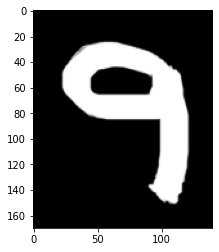

matching locations: [[279 249]]


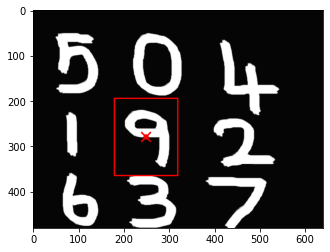

In [331]:
hdraw=np.array(cv2.imread("images/hdraw.png",0))

print("image: ")
plt.imshow(hdraw,cmap="gray")
plt.show()

hdraw_cropped=[]

for i in [0,1,2,3,4,5,6,7,9]:
    hdraw_cropped.append(np.array(cv2.imread(f"images/hdraw_{i}.png",0)))
    
for img in hdraw_cropped:
    
    print("search: ")
    plt.imshow(img,cmap="gray")
    plt.show()

    box_img,locs=locate(hdraw,img)

    print("matching locations:", locs)
    plt.imshow(box_img)
    plt.show()

matching locations: [[262 332]]


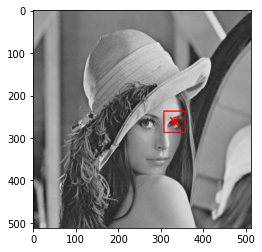

In [339]:
img_np=np.array(img)
left_eye_np=np.array(cv2.imread("images/Lena_left_eye.png",0))

box_img,locs=locate(img_np,left_eye_np)

print("matching locations:", locs)
plt.imshow(box_img)
plt.show()